# Linear Regression From Scratch

#### 添加依赖

In [18]:
import matplotlib.pyplot as plt
import math

#### 导入数据集

In [19]:
x = [12.3,14.3,16.5,16.5,13.7,12.6,16.7,18.9,10.9,16.4,22.4,25.6,27.8,21.4,25.9,16.8]
y = [22.3,24.3,26.5,26.5,23.7,22.6,26.7,28.9,20.9,26.4,12.4,15.6,17.8,11.4,15.9,26.8]

In [20]:
print(len(x))

16


#### 将数据集分为训练集与测试集

In [21]:
x_train = x[0:8]
y_train = y[0:8]
n_train = len(x_train)
print(n_train)

x_test = x[8:]
y_test = y[8:]
n_test = len(x_test)
print(n_test)

8
8


#### 开始拟合一次模型 $y = w_1*x + w_2*x^2 + b$ 

In [22]:
w_1 = -0.1  # 随机初始化w_1值
w_2 = 0.3  # c初始化w_2的值
b = 3  # 随机初始化b值
# Adamgrade,学习率也跟着变化
lr_w_1 = 0.0
lr_w_2 = 0.0
lr_b = 0.0

#### 循环算 $\hat y$

In [23]:
## 开始进行回归运算
for j in range(1000):
    sum_w_1 = 0.0
    sum_w_2 = 0.0
    sum_b = 0.0
    for i in range(n_train):
        y_hat = w_1 * x_train[i] + w_2 * (x_train[i] ** 2) + b
        sum_w_1 += (y_train[i] - y_hat) * -x_train[i]
        sum_w_2 += (y_train[i] - y_hat) * (-x_train[i] ** 2)
        sum_b += (y_train[i] - y_hat) * -1
    det_w_1 = 2 * sum_w_1
    det_w_2 = 2 * sum_w_2
    det_b = 2 * sum_b
    
    lr_w_1 = lr_w_1 + (det_w_1 ** 2)
    lr_w_2 = lr_w_2 + (det_w_2 ** 2)
    lr_b = lr_b + (det_b ** 2)
    
    w_1 = w_1 - (1/math.sqrt(lr_w_1) * det_w_1)
    w_2 = w_2 - (1/math.sqrt(lr_w_2) * det_w_2)
    b = b - (1/math.sqrt(lr_b) * det_b)
print(w_1,w_2,b)

1.0705415001811738 0.012416233587346831 5.737704244256639


### 画图

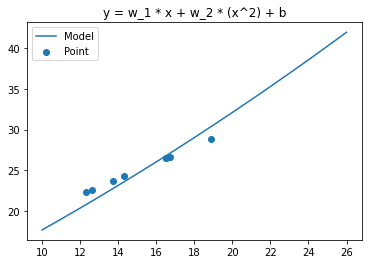

In [24]:
# 训练集线性回归图图
fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
ax.plot([i for i in range(10 , 27)], [w_1 * i + w_2 * (i ** 2) + b for i in range(10, 27)])
plt.title('y = w_1 * x + w_2 * (x^2) + b')
plt.legend(('Model', 'Point'), loc = 'upper left')
plt.show()

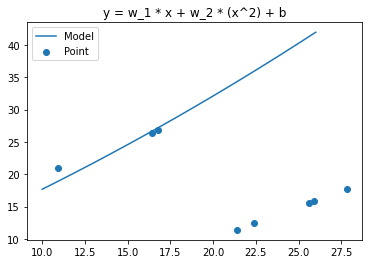

In [25]:
# 测试集线性回归图图
fig, ax = plt.subplots()
ax.scatter(x_test, y_test)
ax.plot([i for i in range(10 , 27)], [w_1 * i + w_2 * (i ** 2) + b for i in range(10, 27)])
plt.title('y = w_1 * x + w_2 * (x^2) + b')
plt.legend(('Model', 'Point'), loc = 'upper left')
plt.show()

### 计算损失值

In [26]:
total_train_loss = 0
for i in range(n_train):
    y_hat = w_1 * x_train[i] + w_2 * (x_train[i] ** 2) + b
    total_train_loss = (y_train[i] - y_hat) ** 2

total_test_loss = 0
for i in range(n_test):
    y_hat = w_1 * x_test[i] + w_2 * (x_test[i] ** 2) + b
    total_test_loss = (y_test[i] - y_hat) ** 2
print(total_train_loss,total_test_loss)

2.2684619090131806 0.18246499495354596
